### The purpose of this tutorial is to walk through the execution of this code, starting with inputs and calculating the displacements and forces on the matrix defined. 

In [ ]:
#Import Libraries

import numpy as np
import matplotlib.pyplot as plt
from src import *

In [37]:
# Define inputs
E = 10000  # Young's Modulus (Pa)
nu = 0.3  # Poisson's Ratio
#Radius and Area
r = 1 
A = np.pi * r**2 
#Moments of Inertia
Iy = np.pi * r**4 / 4
Iz = np.pi * r**4 / 4
Irho = np.pi * r**4 / 2
J = np.pi * r**4 / 2

#Define Nodes (x,y,z, node_id)
nodes = np.array([
    [0.0, 0.0, 0.0, 0],
    [18.0*(1/6), 56*(1/6), 44*(1/6), 1],
    [18.0*(2/6), 56*(2/6), 44*(2/6), 2],
    [18.0*(3/6), 56*(3/6), 44*(3/6), 3],
    [18.0*(4/6), 56*(4/6), 44*(4/6), 4],
    [18.0*(5/6), 56*(5/6), 44*(5/6), 5],  
    [18.0, 56.0, 44.0, 6], 
])

#Connect the Nodes
elements = np.array([
    [0, 1],
    [1, 2], 
    [2, 3],  
    [3, 4], 
    [4, 5], 
    [5, 6], 
])

#Assign constraints
# (0.0, 0.0, 0.0, 0.0, 0.0, 0.0) = fixed node
# (0.0, 0.0, 0.0, None, None, None) = pinned node
# (None, None, None, None, None, None) = free node
fixed_nodes = {
    0: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 
    1: (None, None, None, None, None, None),
    2: (None, None, None, None, None, None), 
    3: (None, None, None, None, None, None),
    4: (None, None, None, None, None, None), 
    5: (None, None, None, None, None, None),
    6: (None, None, None, None, None, None),
}

loads = {
    6: (0.05, -0.1, 0.23, 0.1, -0.025, -0.08),
}

### Compute Displacements and Forces


In [38]:
# --- Analysis and Plotting ---
# Set up boundary conditions
beam = Beam(nodes, elements, E, nu, A, Iy, Iz, Irho, J)
bc = BoundaryCondition(fixed_nodes)
for node_id, load in loads.items():
    bc.apply_load(node_id, load)

# Run the analysis
solver = BeamSolver(beam, bc)
displacements, reactions = solver.solve()
print("Static Analysis Results:")
solver.display_results(displacements, reactions) 
print("Internal Forces per Element:")
for elem_id, forces in solver.internal_forces.items():
    print(f"Element {elem_id}: {np.round(forces, 5)}")


Static Analysis Results:
Node 0 Displacements: [dX: 0.0, dY: 0.0, dZ: 0.0, RX: 0.0, RY: 0.0, RZ: 0.0]
Node 0 Reactions: [FX: -0.05, FY: 0.1, FZ: -0.23, MX: -17.38, MY: 1.965, MZ: 4.68]
---
Node 1 Displacements: [dX: 0.02158, dY: -0.10417, dZ: 0.12381, RX: 0.02484, RY: -0.00283, RZ: -0.00671]
Node 1 Reactions: [FX: 0.0, FY: 0.0, FZ: 0.0, MX: 0.0, MY: 0.0, MZ: 0.0]
---
Node 2 Displacements: [dX: 0.08132, dY: -0.3924, dZ: 0.46625, RX: 0.0452, RY: -0.00515, RZ: -0.01222]
Node 2 Reactions: [FX: 0.0, FY: 0.0, FZ: 0.0, MX: 0.0, MY: 0.0, MZ: 0.0]
---
Node 3 Displacements: [dX: 0.17178, dY: -0.82818, dZ: 0.98392, RX: 0.06106, RY: -0.00697, RZ: -0.01654]
Node 3 Reactions: [FX: 0.0, FY: 0.0, FZ: 0.0, MX: 0.0, MY: 0.0, MZ: 0.0]
---
Node 4 Displacements: [dX: 0.28549, dY: -1.375, dZ: 1.6334, RX: 0.07243, RY: -0.00828, RZ: -0.01967]
Node 4 Reactions: [FX: 0.0, FY: 0.0, FZ: 0.0, MX: 0.0, MY: 0.0, MZ: 0.0]
---
Node 5 Displacements: [dX: 0.41499, dY: -1.99634, dZ: 2.37127, RX: 0.07932, RY: -0.00909, RZ

### Elastic Critical Mode Analysis

Elastic Critical Load Factor [17.31135893 48.66842153 51.03788006]


/workspaces/Assignment2/src/src.py:335: ComplexWarning: Casting complex values to real discards the imaginary part
  full_eigvecs[unknown_dofs, :] = filtered_eigvecs


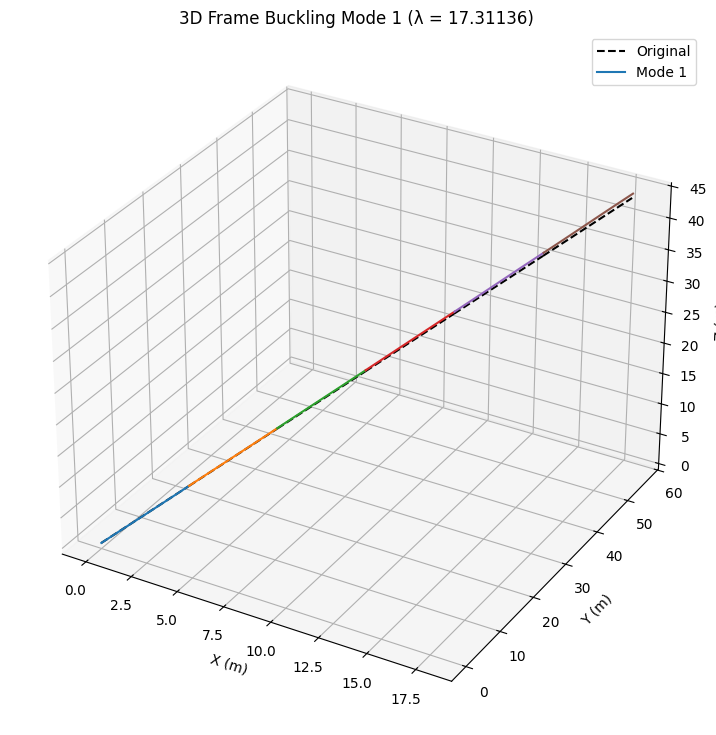

In [39]:
# Buckling analysis
eigvals, eigvecs, buckling_forces = solver.solve_buckling()

eigenvals = eigvals [:3]
print ('Elastic Critical Load Factor', eigenvals)

# Generate plot
plot_buckling_mode(beam, eigvecs, buckling_forces, eigvals)